# Lecture 23: Center and Spread


In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

# Average #

## Calculating the average (a.k.a. mean) ##

In [2]:
values = [2, 3, 3, 9]

In [3]:
(2 + 3 + 3 + 9)/4

4.25

In [4]:
sum(values)/len(values)

4.25

In [5]:
np.average(values)

4.25

In [6]:
np.mean(values)

4.25

## The Average and the Histogram ##

In [7]:
2 * (1/4) + 3 * (1/4) + 3 * (1/4) + 9 * (1/4)

4.25

In [8]:
2 * (1/4) + 3 * (2/4) + 9 * (1/4)

4.25

In [9]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9

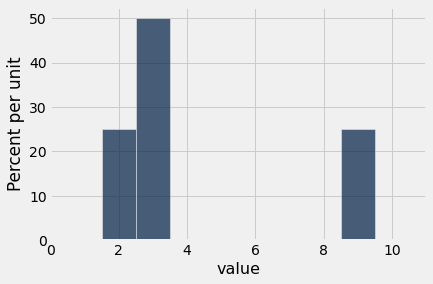

In [10]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

In [11]:
ten_1s = np.ones(10)
ten_1s

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
ten_2s = 2 * ten_1s
ten_9s = 9 * ten_1s

In [13]:
twenty_3s = 3 * np.ones(20)

In [14]:
new_values = np.append(ten_2s, twenty_3s)
new_values = np.append(new_values, ten_9s)
new_values

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9.])

In [15]:
len(new_values)

40

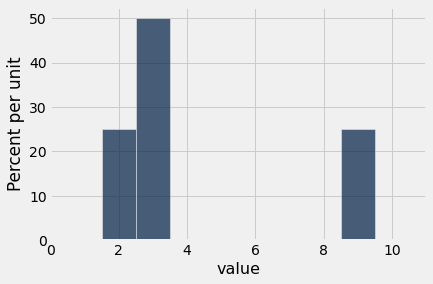

In [16]:
new_values_table = Table().with_columns('value', new_values)
new_values_table.hist(0, bins = bins_for_display)

In [17]:
np.average(values), np.average(new_values)

(4.25, 4.25)

**Back to slides.**

## The Average and the Median ##

In [18]:
dist_1 = [1, 2, 2, 3, 3, 3, 4, 4, 5]
dist_2 = [1, 2, 2, 3, 3, 3, 4, 4, 10]

In [19]:
percentile(50, dist_1), percentile(50, dist_2)

(3, 3)

In [20]:
np.average(dist_1), np.average(dist_2)

(3.0, 3.5555555555555554)

In [21]:
nba = Table.read_table('nba2013.csv')

In [22]:
nba.labels

('Name', 'Position', 'Height', 'Weight', 'Age in 2013')

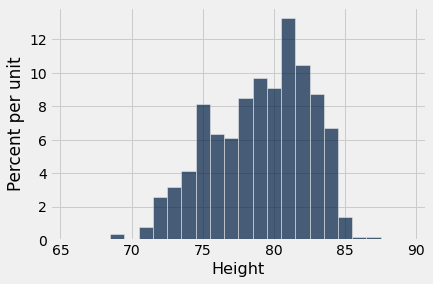

In [23]:
nba.hist('Height', bins=np.arange(65.5, 90.5))

In [24]:
heights = nba.column('Height')
percentile(50, heights), np.average(heights)

(80, 79.06534653465347)

**Back to slides.**

# Standard Deviation #

## Calculating the SD ##

In [25]:
values = [2, 3, 3, 9]
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9

In [26]:
average_value = np.average(sd_table.column(0))
average_value

4.25

In [27]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value | Deviation
2     | -2.25
3     | -1.25
3     | -1.25
9     | 4.75

In [28]:
sum(deviations)

0.0

In [29]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value | Deviation | Squared Deviation
2     | -2.25     | 5.0625
3     | -1.25     | 1.5625
3     | -1.25     | 1.5625
9     | 4.75      | 22.5625

In [30]:
# Variance of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

In [31]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

2.7726341266023544

In [32]:
np.std(values)

2.7726341266023544

**Back to slides.**

## Chebyshev's Bounds ##

In [33]:
births = Table.read_table('baby.csv')

In [34]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight',
 'Maternal Smoker')

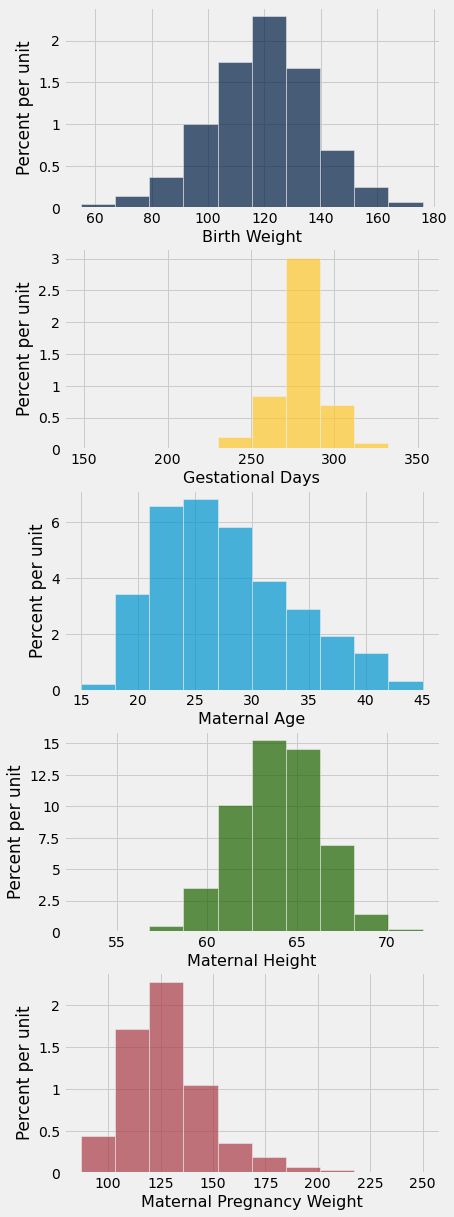

In [35]:
births.drop("Maternal Smoker").hist(overlay=False)

In [36]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.72544970428041)

In [37]:
within_3_SD = births.where('Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))

In [38]:
within_3_SD.num_rows/births.num_rows

0.9863713798977853

In [39]:
for k in births.drop("Maternal Smoker").labels:
    values = births.column(k)
    ave = np.mean(values)
    sd = np.std(values)
    print()
    print(k)
    for z in np.arange(1, 6):
        selected = births.where(k, are.between(ave - z*sd, ave + z*sd))
        proportion = selected.num_rows/births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '%' )


Birth Weight
Average plus or minus 1 SDs: 69.25 %
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.57 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Gestational Days
Average plus or minus 1 SDs: 79.47 %
Average plus or minus 2 SDs: 93.78 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.57 %
Average plus or minus 5 SDs: 99.83 %

Maternal Age
Average plus or minus 1 SDs: 67.46 %
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.91 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Maternal Height
Average plus or minus 1 SDs: 67.38 %
Average plus or minus 2 SDs: 97.19 %
Average plus or minus 3 SDs: 99.66 %
Average plus or minus 4 SDs: 99.91 %
Average plus or minus 5 SDs: 100.0 %

Maternal Pregnancy Weight
Average plus or minus 1 SDs: 73.85 %
Average plus or minus 2 SDs: 95.06 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.49 %
Average plus or minus 

**Back to slides.**

## Standard Units ##

In [40]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x))/np.std(x)

In [44]:
ages = births.column('Maternal Age')
ages

array([27, 33, 28, ..., 30, 21, 38])

In [43]:
ages_standard_units = standard_units(ages)
ages_standard_units

array([-0.03925456,  0.99249577,  0.13270383, ...,  0.47662061,
       -1.07100488,  1.85228771])

In [45]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

In [46]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age In Standard Units', ages_standard_units
)
both

Age in Years | Age In Standard Units
27           | -0.0392546
33           | 0.992496
28           | 0.132704
23           | -0.727088
25           | -0.383171
33           | 0.992496
23           | -0.727088
25           | -0.383171
30           | 0.476621
27           | -0.0392546
... (1164 rows omitted)

In [47]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190897)

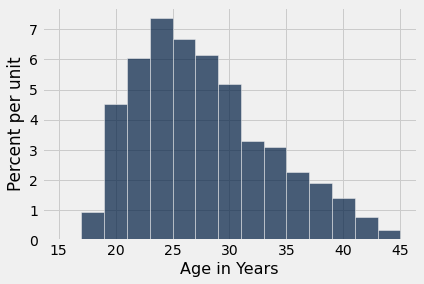

In [48]:
both.hist(0, bins = np.arange(15, 46, 2))

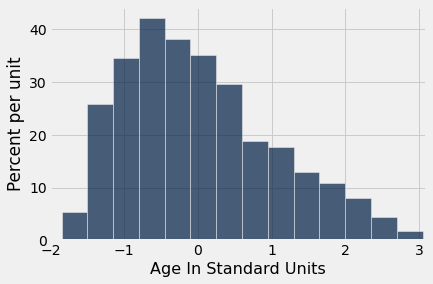

In [49]:
both.hist(1, bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);